<center>
    <h1>Introduction to Storm</h1>
    <h2>Sebastian Junges and Joost-Pieter Katoen</h2>
    <h3>using material by the Storm Developers</h3>
    <br>
    <br>
<img src="attachment:storm_logo.png" width="500px"/></center>

**<center>[www.stormchecker.org](https://www.stormchecker.org)</center>**

<div align="right">Press <em>spacebar</em> to navigate</div>

## Storm
A modern probabilistic model checker
- **State-of-the-art**: best performance at [QComp 2020](http://qcomp.org/competition/2020/index.html)
- **Modular**: dedicated solvers for each task, interchangable libraries
- Written in **C++**, **Python interface** via [stormpy](https://moves-rwth.github.io/stormpy/)
- **Open-source**, developed since 2012, over 230,000 lines of code

### Getting Storm
- Native support for *Linux* and *macOS* (homebrew formula)
- Virtual machine and Docker containers (also for *Windows*)

## Getting Storm for this presentation
We use a [Docker container](https://www.docker.com/) based on [Jupyter Notebook](https://jupyter.org/) throughout this presentation.
#### Installation steps:
1. Install [Docker](https://docs.docker.com/get-docker/) for your OS
2. Download (>1 GB) and start the container:
```bash
docker run -it -p 8080:8080 --name stormpyter sjunges/stormpyter:uai22
```
3. Open the Jupyter website indicated in the command line:
[127.0.0.1:8080/...](http://127.0.0.1:8080)
4. Open file **tutorial.ipynb**
5. The presentation should start automatically

## Hands-on presentation

- This is an interactive presentation. You can **execute all commands by yourself**!
- Navigate with *spacebar* and *shift+spacebar*
- All interactive commands can be executed with *shift+enter*
- Switch between presentation and notebook with *alt+r*

### Example

In [ ]:
%alias storm storm #ALWAYS RUN THIS by clicking here and pressing shift+enter

In [ ]:
storm  # This should not throw an error. If it does, execute the command above

You should see the Storm version information.

You can even **change the code**! Try adding the flag `--version`.

## Knuth-Yao Die


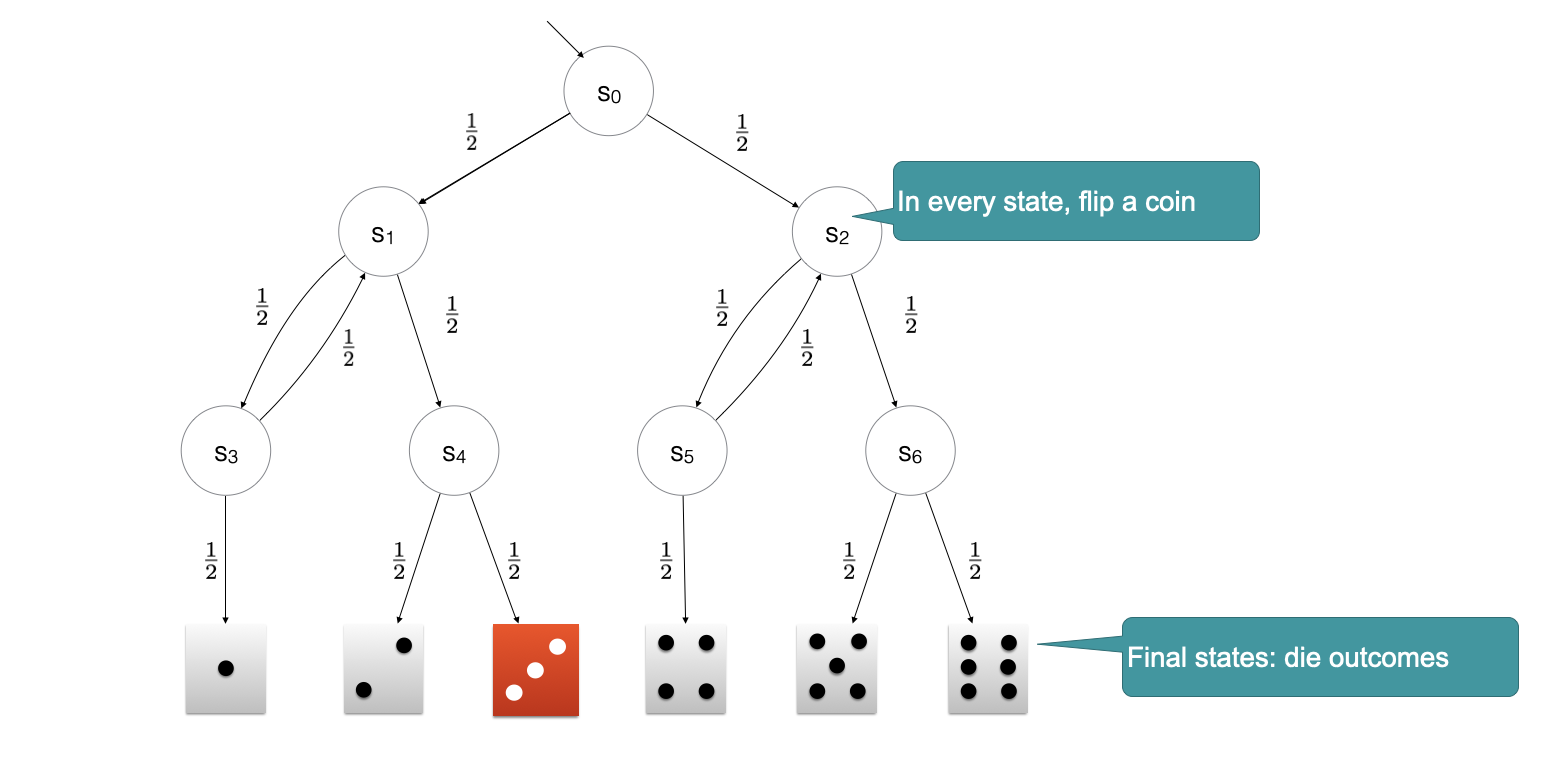

This models a dice roll with a fair coin

## Knuth-Yao Die

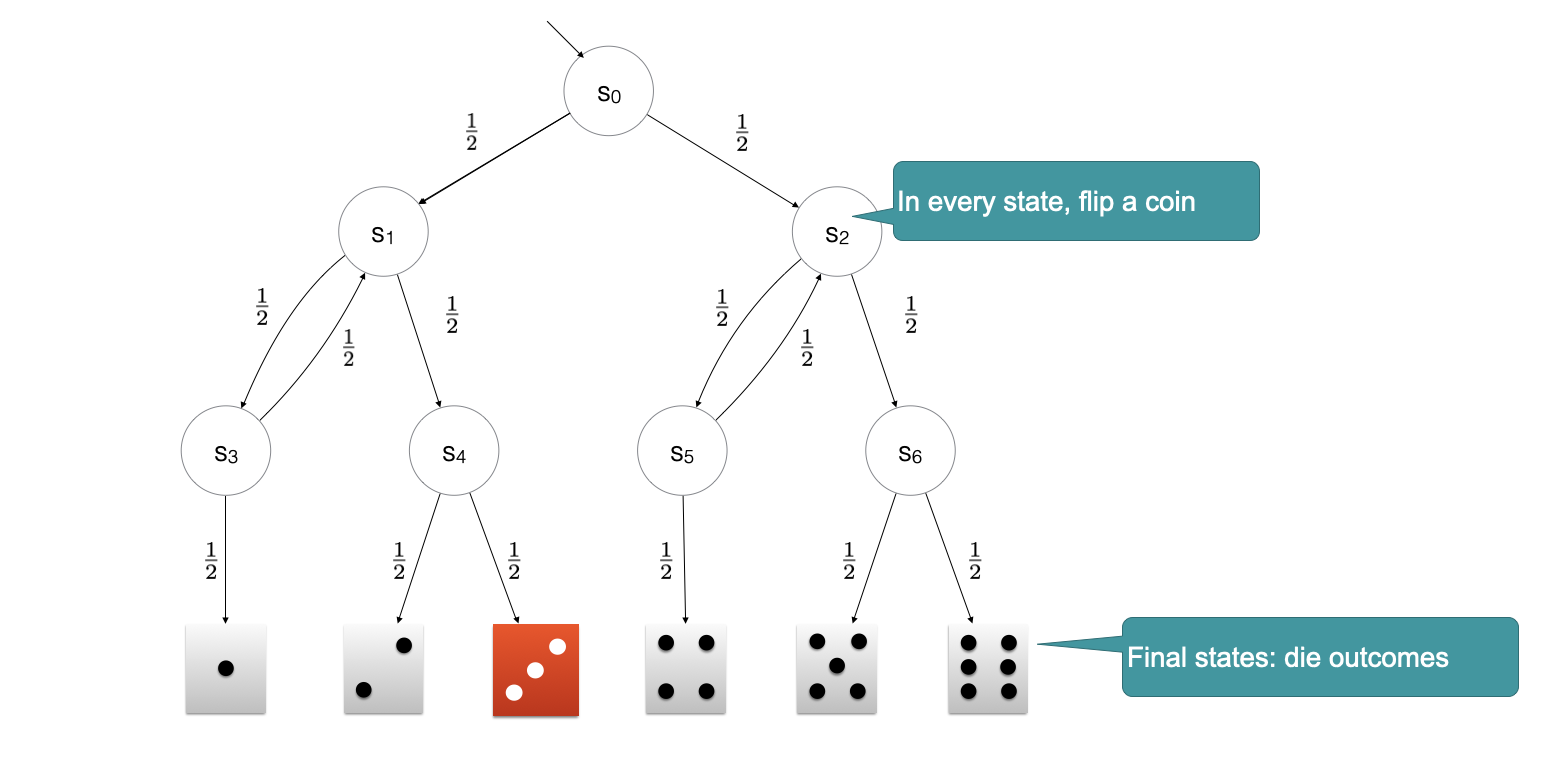

In [ ]:
!tail -n+3 examples/kydie.drn | head -n 25

## Running Storm on KY-Die

In [ ]:
storm --explicit-drn examples/kydie.drn --buildfull

### Computing Reachability Probabilities

In [ ]:
storm --explicit-drn examples/kydie.drn --prop 'P=? [F "out3" ]' | tail -n+7

### Computing Exected Time (steps)

In [ ]:
storm --explicit-drn examples/kydie.drn --prop 'T=? [F "done" ]' | tail -n+7

## Input formats
- Storm supports a variety of input formats:
    - [Prism language](https://www.prismmodelchecker.org/manual/ThePRISMLanguage/Introduction)
    - [Jani modelling language](http://www.jani-spec.org/)
    - Explicit format
    - Generalized stochastic Petri nets
    - Domain specific languages, e.g., Dynamic Fault Trees

## Intro to Prism format

## KY-die with Prism

Naive encoding:
- Variable *s* encodes the state
- Describe an update for every state
- Single module

In [ ]:
!tail -n20 examples/kydie-naive.prism | head -n 16

## Single-Module Prism

 - A module contains declarations of (local) variables and commands.
 
 - Commands

  $$
\textbf{[}action\textbf{]}~ \text{guard} ~\textbf{->}~ \text{probability}\textbf{:} \text{update} \textbf{ + }\text{probability}\textbf{:} \text{update} + \dots
  $$

    - *action*: Synchronization label (may be empty)
    - *guard*: Boolean combination of inequalities involving local and global variables
    - *probability*: expression  between 0 and 1. The probabilities of each command have to sum up to 1.
    - *update*: Assigns new values to (a subset of) the variables. 
    $$\texttt{var}' = f(\texttt{vars})$$

- Every action refers to an action in the MDP

## Gridworld with Prism

- Robot in an N by N grid
- Own position given by x,y
- Up to 4 actions

In [ ]:
!cat examples/grid.prism

## Gridworld with Prism

- Robot in an N by N grid
- Own position given by x,y
- Up to 4 actions

In [ ]:
storm --prism examples/grid.prism -const N=6 | tail -n+6 | head -n 10

In [ ]:
storm --prism examples/grid.prism -const N=60 --prop "Tmin=? [F y=N & x=N]" | tail -n 3

# Advanced properties

We consider a selection of slightly more advanced queries

We therefore also extend the MDP description...

In [ ]:
!tail -n 10 examples/grid_complete.prism

## Cost-bounded reachability

- Simple extension to reachability
- Storm can handle multi-reward-bounded formulas and compute quantiles

In [ ]:
storm --prism examples/grid_complete.prism -const N=30 --prop "Pmax=? [F{\"movementcost\"}<=40 \"castle\"]" | tail -n+8

## LTL properties

In [ ]:
storm --prism examples/grid_complete.prism -const N=6 --prop "Pmax=? [GF \"station\" & GF \"castle\"]" | tail -n 3

In [ ]:
storm --prism examples/grid_complete.prism -const N=6 --prop "Pmax=? [F<=7 \"station\" & F<=7 \"castle\"]" | tail -n 3

In [ ]:
storm --prism examples/grid_complete.prism -const N=6 --prop "Pmax=? [F<=7 \"station\"];Pmax=? [F<=7 \"castle\"]" | tail -n7

## Extracting Policies ('Schedulers')

In [ ]:
storm --prism examples/grid.prism -const N=6 --prop "Tmin=? [F x=3 & y > 4]" --exportscheduler plain.sched | tail -n8

In [ ]:
!head -n10 plain.sched

## Extracting Policies 

In [ ]:
storm --prism examples/grid.prism -const N=6 --prop "Tmin=? [F x=3 & y > 4]" --exportscheduler high.sched --buildchoicelab --buildstateval | tail -n4

In [ ]:
!head -n10 high.sched

# Methods and Engines

## Computing exact values
- Floating point arithmetic and convergence criteria might not be precise  
  &#10140; use exact (rational) numbers and sound algorithms off-the-shelf
- Drawback: performance decreases

In [ ]:
storm --explicit-drn examples/kydie.drn --prop 'P=? [F "out1"]' | tail -n2

In [ ]:
storm --explicit-drn examples/kydie.drn --prop 'P=? [F "out1"]' --exact | tail -n2

## Different methods
- Variations of value iteration with stronger guarantees
- Policy iteration, hybrid methods
- Abstraction-based approaches

In [ ]:
storm --prism examples/grid_complete.prism -const N=40 --prop "Tmin=? [F x=3 & y>4]" --minmax:method lp | tail -n3

In [ ]:
storm --prism examples/grid_complete.prism -const N=40 --prop "Tmin=? [F x=3 & y>4]" --minmax:method vi | tail -n3

## Engines in Storm
Storm supports different model representations:
- **Sparse matrix**:
    - Model building is time and memory intensive
    - Fast numerical computations
- **Binary Decision Diagrams (BDD)**:
    - Fast and memory efficient model building if model is structured
    - Slower numerical computations
- **Hybrid** approach:
    - Build with BDD, use sparse matrix for numerical computations
- ...

## Engines in Storm

In [ ]:
storm --prism examples/grid.prism -const N=800 --prop 'Tmin=? [F x=3 & y > 4]' -e dd --minmax:method vi | tail -n 3

In [ ]:
storm --prism examples/grid.prism -const N=800 --prop 'Tmin=? [F x=3 & y > 4]' -e sparse --minmax:method vi | tail -n 3

## Bisimulation minimization
- Reduces state-space size without loosing information
- Exploits symmetries

In [ ]:
storm --bisimulation --prism examples/phil-nofair3.nm --prop 'filter(forall, P>=1 [F "eat"], "hungry")' |tail -n+9 | head -n 30

## Summary
- Basic introduction to **Storm command-line interface**
- Storm supports broad range of **models and properties** given in high-level description languages
- Different **engines** allow tailored analysis per model and property

### Next:
Model checking **in the loop** using Stormpy

# Intro to Stormpy

- Basic model checking
- Tradeoff analysis
- Robustness analysis
- Simulation engines

In [ ]:
import stormpy
import stormpy.info

print(
    "Stormpy version: "
    + stormpy.__version__
    + " using Storm in version: "
    + stormpy.info.storm_version()
)

## Basic Model Checking

- Parse input-description and translate into MDP

In [ ]:
orig_program = stormpy.parse_prism_program("examples/grid_slip_forward.prism")
program = orig_program.define_constants(
    stormpy.parse_constants_string(orig_program.expression_manager, "N=6,p=0.9,q=0.7")
)

In [ ]:
options = stormpy.BuilderOptions(True, True)
options.set_build_state_valuations()
options.set_build_choice_labels()
model = stormpy.build_sparse_model_with_options(program, options)
print("Number of states: {}".format(model.nr_states))
print("Labels: {}".format(model.labeling.get_labels()))

- Run model checking query

In [ ]:
properties = stormpy.parse_properties('Pmax=? [F<=8 "station"]')
result = stormpy.model_checking(model, properties[0])
print(result.at(model.initial_states[0]))

## Tradeoff analysis

- Find values that can be achieved by a single policy

In [ ]:
import matplotlib.pyplot as plt
from stormpy.utility.multiobjective_plotting import (
    plot_convex_pareto_curve_demo,
    prepare_multiobjective_result_for_plotting,
)

properties = stormpy.parse_properties_for_prism_program(
    'multi(Pmax=? [ F<=11 "castle" ], Pmax=? [ F<=8 "station" ])', program
)
result = stormpy.model_checking(model, properties[0])
print(result.get_underapproximation().vertices)

- Plot the outcome

In [ ]:
lower_left = [0, 0]
upper_right = [1, 1]
formula = properties[0].raw_formula
fig, ax = plt.subplots()

underapprox_points, overapprox_points = prepare_multiobjective_result_for_plotting(
    result, lower_left, upper_right, formula
)
plot_convex_pareto_curve_demo(
    ax, underapprox_points, overapprox_points, lower_left, upper_right
)
ax.set_xlabel(formula.subformulas[0])
ax.set_ylabel(formula.subformulas[1])

## Robustness with Parametric Checking

### Step 1: Compute an optimal policy

In [ ]:
properties = stormpy.parse_properties('R{"movecost"}min=? [ F "station"]')
result = stormpy.model_checking(model, properties[0], extract_scheduler=True)
scheduler = result.scheduler
print(result.at(model.initial_states[0]))

### Step 2: Set-up an MDP with parametric slipiness

In [ ]:
program2 = orig_program.define_constants(
    stormpy.parse_constants_string(orig_program.expression_manager, "N=6, q=p")
)
parametric_model = stormpy.build_sparse_parametric_model_with_options(program2, options)
print("Number of states: {}".format(model.nr_states))
print("Number of transitions: {}".format(model.nr_transitions))
print("Labels: {}".format(model.labeling.get_labels()))

### Step 3: Apply the policy on this parametetric MDP and evaluate performance

In [ ]:
induced_model = parametric_model.apply_scheduler(
    scheduler.cast_to_parametric_datatype()
)

In [ ]:
result = stormpy.model_checking(induced_model, properties[0]).at(
    induced_model.initial_states[0]
)
print(result)

In [ ]:
import numpy as np

plt.xlabel("slippiness p")
plt.ylabel("Expected cost until station")
plt.title("Movement cost for fixed policy")

p = np.linspace(0.001, 0.999, 100)
plt.axis((0, 1, 0, 60))
plot_func = eval(str(result).replace("^", "**"))
plt.plot(p, plot_func, linewidth=2);

### Step 4: Computing the regret

- First, we find the best-case slipiness for p in [0.1, 0.2]
- We also compute the associated expected movement cost 

In [ ]:
import stormpy.pars as spp

stormpy.set_loglevel_error()
env = stormpy.Environment()
checker = spp.create_region_checker(env, parametric_model, properties[0].raw_formula)
region_string = "0.1<=p<=0.2"
region = spp.ParameterRegion.create_from_string(
    region_string, parametric_model.collect_probability_parameters()
)
precision = stormpy.RationalRF(0.01)
best_case_result = checker.compute_extremum(
    env, region, stormpy.OptimizationDirection.Minimize, precision
)
print(
    str(best_case_result[0])
    + " or approx "
    + str(float(best_case_result[0].constant_part()))
)

- We can now compare this value to the value by the scheduler

In [ ]:
print(float(result.evaluate(best_case_result[1])))

## Simulation

Storm supports gym-inspired bindings for simulations

### Variant 1: High-level simulators

In [ ]:
import random

import stormpy.simulator as ssim

random.seed(3)
simulator = ssim.create_simulator(program, seed=42)
simulator.set_action_mode(ssim.SimulatorActionMode.GLOBAL_NAMES)

paths = []
for m in range(3):
    path = []
    state, reward, labels = simulator.restart()
    path = [f"({state['x']},{state['y']})"]
    for n in range(6):
        actions = simulator.available_actions()
        select_action = random.randint(0, len(actions) - 1)
        path.append(f"--{actions[select_action]}-->")
        state, reward, labels = simulator.step(actions[select_action])
        path.append(f"({state['x']},{state['y']})")
        if simulator.is_done():
            break
    paths.append(path)
for path in paths:
    print(" ".join(path))

### Variant 2: Model-level simulators

In [ ]:
import random

import stormpy.simulator as ssim

random.seed(3)
induced_model = model.apply_scheduler(scheduler)
simulator = ssim.create_simulator(model.apply_scheduler(scheduler), seed=42)
simulator.set_observation_mode(ssim.SimulatorObservationMode.PROGRAM_LEVEL)

paths = []
for m in range(3):
    path = []
    state, reward, labels = simulator.restart()
    path = [f"({state['x']},{state['y']})"]
    for n in range(6):
        path.append(f"-->")
        state, reward, labels = simulator.step()
        path.append(f"({state['x']},{state['y']})")
        if simulator.is_done():
            break
    paths.append(path)
for path in paths:
    print(" ".join(path))

# Summary

- Support for wide variety of models and queries
- Variety of methods and engines for advanced users
- Python API (or C++ API) allows for flexible use of model checker as backend
- Actively maintained and extended